# Predictive Maintenance for machine using sensor data
This app gets uses data from https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020
It involves data analyses, data cleanup, Standardization and using predictive models

**Notes**
<p style="color:blue;">Import required libraries to use in this notebook <\p>

In [115]:
import warnings
import pandas as pd
import numpy as np
import os
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
%matplotlib inline     
sns.set(color_codes=True)

In [116]:

path = os.path.abspath(f'{os.getcwd()}\\data\\data.csv')
df = pd.read_csv(path)
# To display the top 5 rows 
df.head(5)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [117]:
df.tail(5)                        # To display the botton 5 rows

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [118]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

**Notes**
<p style="color:blue;"><i>Drop the test columns that are not required to be part of features.</i></p>

In [119]:
df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


**Notes**
<p style="color:blue;"><i>Describe the data frame to analyze the numerical data distribution</i></p>

In [120]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [121]:
df.shape

(10000, 6)

**Notes**
<p style="color:blue;"><i>Check if there are any duplicate rows</i></p>

In [122]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [123]:
df.count()      # Used to count the number of rows

Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
dtype: int64

In [124]:
print(df.isnull().sum())

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64


> <i> Detecting outliers </i> 

<Axes: xlabel='Air temperature [K]'>

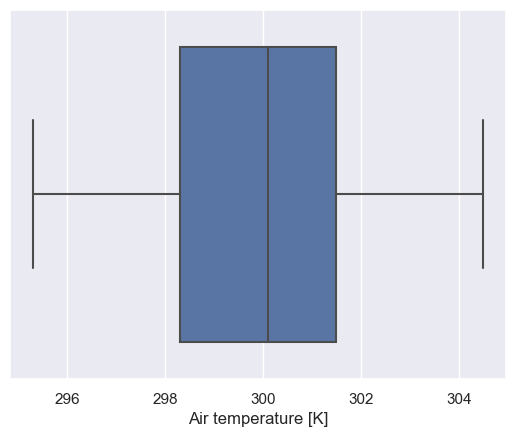

In [125]:
sns.boxplot(x=df['Air temperature [K]'])

> <i> Histogram </i><br>> <i> 
Histogram refers to the frequency of occurrence of variables in an interval </i>.

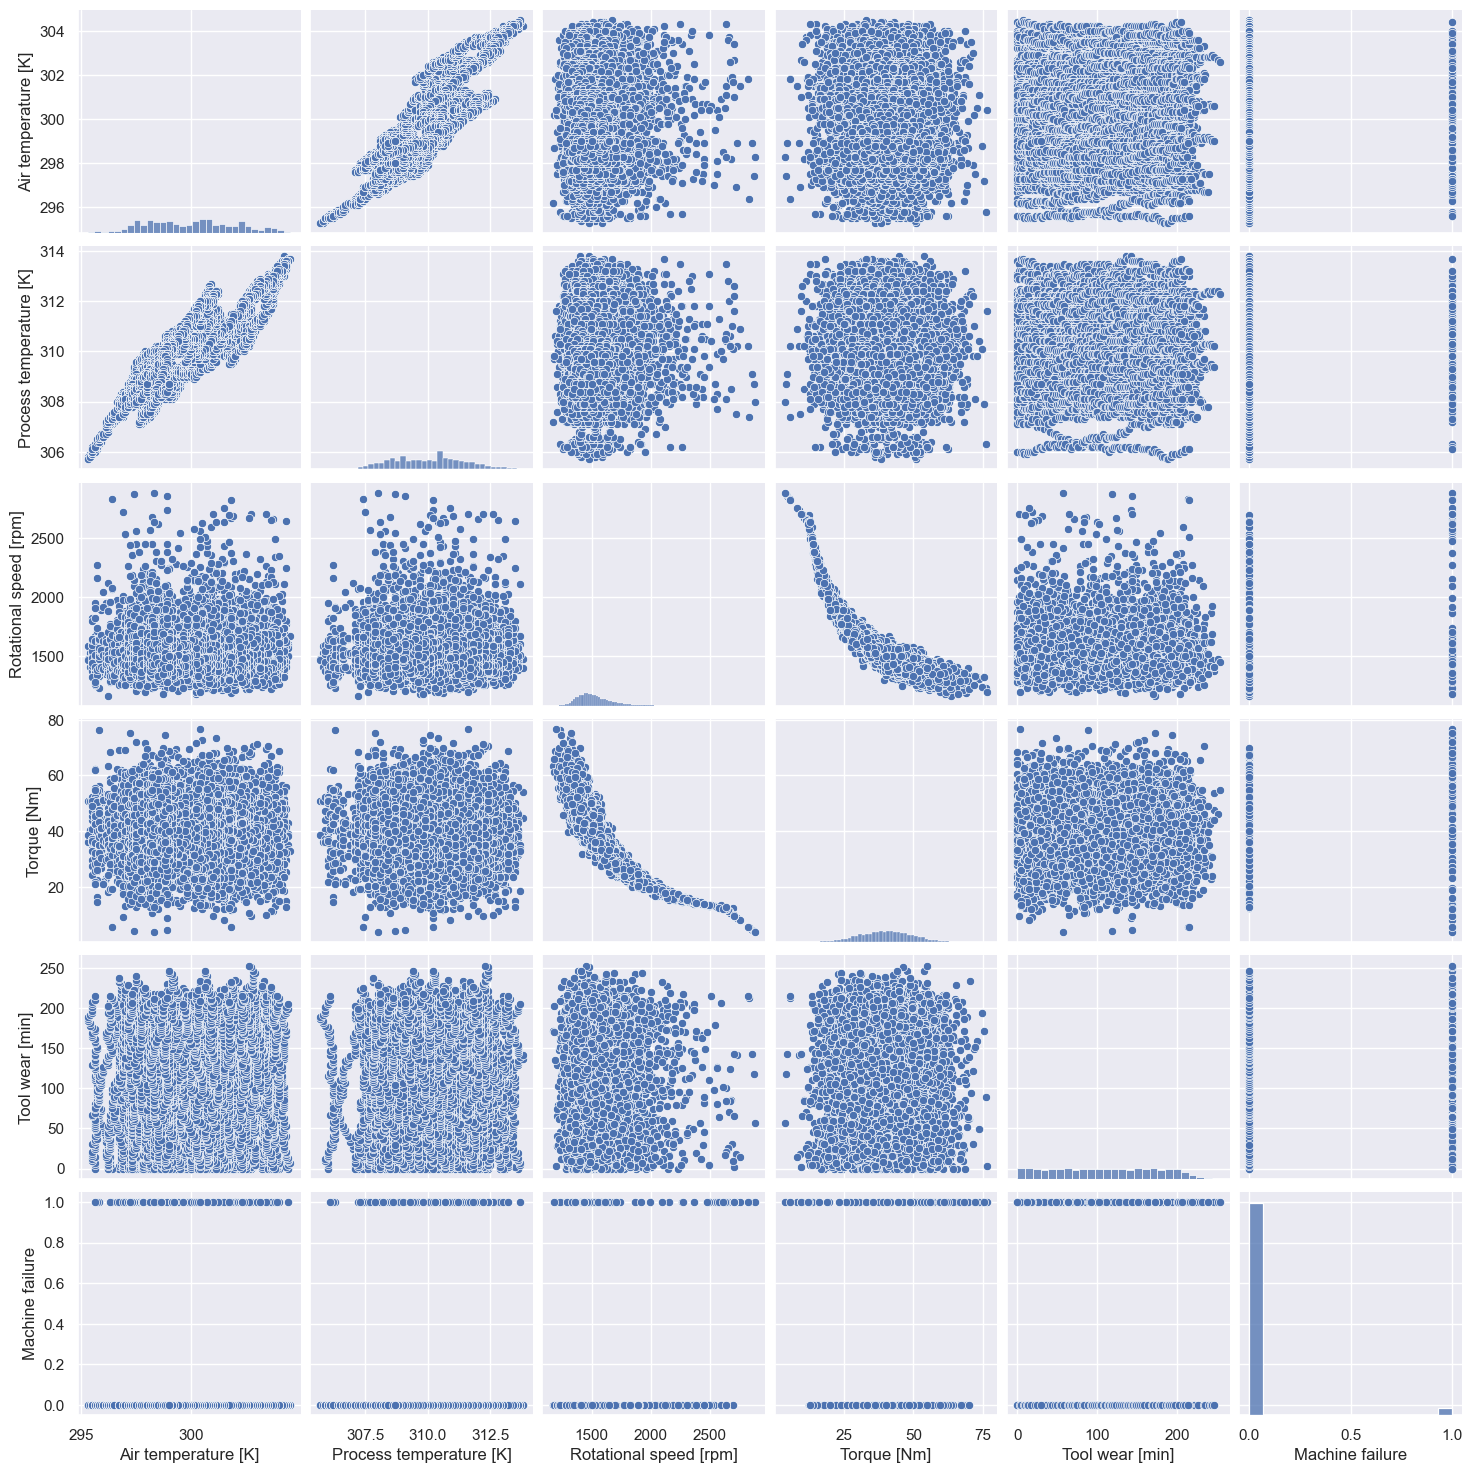

In [126]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df)

<p style="color:blue;" >Standardization is a very important concept in feature scaling which is an integral part of feature engineering. When you collect data for data analysis or machine learning, we will be having a lot of features, which are independent features. With the help of the independent features, we will try to predict the dependent feature in supervised learning. While seeing the data if you see there will be more noise in the data which will put the model at risk of being influenced by the outliers. So for this, we will commonly normalize or standardize the data.</p>

<p style="color:blue;">Sci-kit earn is a machine learning and model building library. We can perform many operations in this library like preprocessing, Analyzing, and also model building for all kinds of machine learning like supervised, and Unsupervised learning problems. In this library, a preprocessing method called standardscaler() is used for standardizing the data.</p>

In [127]:
df.head(5)


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [128]:
scaler=StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.head(5)

,0,1,2,3,4,5
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322


In [129]:
print(df.describe())

                  0             1             2             3             4  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -9.322321e-16 -1.693934e-15 -2.330580e-16  5.424994e-16  1.051603e-16   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -2.352278e+00 -2.901986e+00 -2.068196e+00 -3.630149e+00 -1.695984e+00   
25%   -8.523974e-01 -8.125581e-01 -6.458012e-01 -6.808401e-01 -8.633176e-01   
50%    4.753123e-02  6.365340e-02 -1.995597e-01  1.134481e-02  7.698234e-04   
75%    7.474757e-01  7.376623e-01  4.084443e-01  6.834663e-01  8.491466e-01   
max    2.247357e+00  2.557486e+00  7.514840e+00  3.672902e+00  2.278819e+00   

                  5  
count  1.000000e+04  
mean   2.842171e-18  
std    1.000050e+00  
min   -1.873220e-01  
25%   -1.873220e-01  
50%   -1.873220e-01  
75%   -1.873220e-01  
max    5.338401e+00  


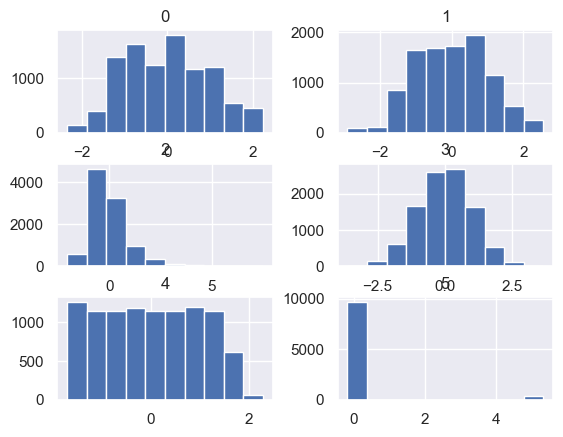

In [130]:
df.hist()
plt.show()

In [134]:
X = df[[0,1,2,3,4]].copy()
Y = df[[5]].copy()
X.head(5)


,0,1,2,3,4
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588


In [135]:
Y.head(5)

,5
0,-0.187322
1,-0.187322
2,-0.187322
3,-0.187322
4,-0.187322
